In [4]:
import keras
import numpy as np
from keras.datasets import imdb

keras.__version__

'2.2.2'

In [5]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [6]:
from keras import models
from keras import layers

original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

In [8]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [9]:
original_hist = original_model.fit(x_train, y_train,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 252us/step - loss: 0.4571 - acc: 0.8166 - val_loss: 0.3328 - val_acc: 0.8833
Epoch 2/20
25000/25000 [==============================] - 5s 201us/step - loss: 0.2582 - acc: 0.9076 - val_loss: 0.2886 - val_acc: 0.8870
Epoch 3/20
25000/25000 [==============================] - 5s 200us/step - loss: 0.1971 - acc: 0.9291 - val_loss: 0.2814 - val_acc: 0.8886
Epoch 4/20
25000/25000 [==============================] - 5s 201us/step - loss: 0.1651 - acc: 0.9418 - val_loss: 0.2955 - val_acc: 0.8842
Epoch 5/20
25000/25000 [==============================] - 5s 199us/step - loss: 0.1408 - acc: 0.9502 - val_loss: 0.3407 - val_acc: 0.8712
Epoch 6/20
25000/25000 [==============================] - 5s 200us/step - loss: 0.1222 - acc: 0.9590 - val_loss: 0.3408 - val_acc: 0.8758
Epoch 7/20
25000/25000 [==============================] - 5s 199us/step - loss: 0.1089 - acc: 0.9636 - val_loss: 0.3674 - 

In [10]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 5s 210us/step - loss: 0.5826 - acc: 0.7415 - val_loss: 0.5278 - val_acc: 0.7955
Epoch 2/20
25000/25000 [==============================] - 5s 200us/step - loss: 0.4850 - acc: 0.8562 - val_loss: 0.4880 - val_acc: 0.8361
Epoch 3/20
25000/25000 [==============================] - 5s 201us/step - loss: 0.4403 - acc: 0.8933 - val_loss: 0.4662 - val_acc: 0.8586
Epoch 4/20
25000/25000 [==============================] - 5s 200us/step - loss: 0.4103 - acc: 0.9139 - val_loss: 0.4518 - val_acc: 0.8732
Epoch 5/20
25000/25000 [==============================] - 5s 204us/step - loss: 0.3865 - acc: 0.9287 - val_loss: 0.4547 - val_acc: 0.8593
Epoch 6/20
25000/25000 [==============================] - 5s 203us/step - loss: 0.3662 - acc: 0.9375 - val_loss: 0.4461 - val_acc: 0.8676
Epoch 7/20
25000/25000 [==============================] - 5s 202us/step - loss: 0.3477 - acc: 0.9470 - val_loss: 0.4520 - 

In [11]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

In [12]:
import matplotlib.pyplot as plt

plt.clf()

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

In [13]:
bigger_model = models.Sequential()
bigger_model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
bigger_model.add(layers.Dense(512, activation='relu'))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(optimizer='rmsprop',
                     loss='binary_crossentropy',
                     metrics=['acc'])

In [14]:
bigger_model_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 265us/step - loss: 0.4630 - acc: 0.7954 - val_loss: 0.2848 - val_acc: 0.8882
Epoch 2/20
25000/25000 [==============================] - 6s 238us/step - loss: 0.2237 - acc: 0.9120 - val_loss: 0.3084 - val_acc: 0.8730
Epoch 3/20
25000/25000 [==============================] - 6s 242us/step - loss: 0.1352 - acc: 0.9494 - val_loss: 0.3076 - val_acc: 0.8851
Epoch 4/20
25000/25000 [==============================] - 6s 237us/step - loss: 0.0763 - acc: 0.9792 - val_loss: 0.4175 - val_acc: 0.8808
Epoch 5/20
25000/25000 [==============================] - 6s 238us/step - loss: 0.0818 - acc: 0.9856 - val_loss: 0.4809 - val_acc: 0.8818
Epoch 6/20
25000/25000 [==============================] - 6s 241us/step - loss: 0.0728 - acc: 0.9882 - val_loss: 0.4978 - val_acc: 0.8729
Epoch 7/20
25000/25000 [==============================] - 6s 242us/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6401 - 

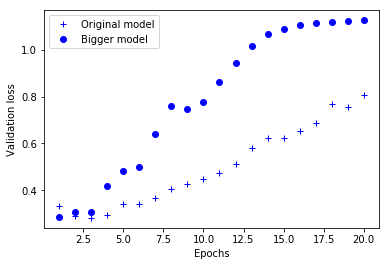

In [15]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.clf()

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

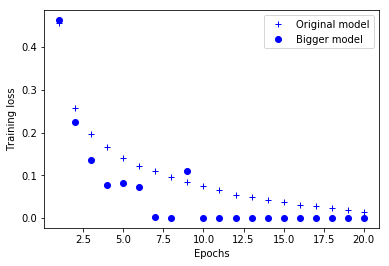

In [16]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.clf()

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

In [19]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                      activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                      activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [20]:
l2_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

In [21]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 6s 239us/step - loss: 0.4864 - acc: 0.8299 - val_loss: 0.3778 - val_acc: 0.8822
Epoch 2/20
25000/25000 [==============================] - 6s 224us/step - loss: 0.3150 - acc: 0.9044 - val_loss: 0.3368 - val_acc: 0.8859
Epoch 3/20
25000/25000 [==============================] - 6s 222us/step - loss: 0.2698 - acc: 0.9204 - val_loss: 0.3403 - val_acc: 0.8820
Epoch 4/20
25000/25000 [==============================] - 5s 216us/step - loss: 0.2518 - acc: 0.9271 - val_loss: 0.3336 - val_acc: 0.8873
Epoch 5/20
25000/25000 [==============================] - 5s 218us/step - loss: 0.2394 - acc: 0.9314 - val_loss: 0.3926 - val_acc: 0.8636
Epoch 6/20
25000/25000 [==============================] - 5s 217us/step - loss: 0.2296 - acc: 0.9352 - val_loss: 0.3451 - val_acc: 0.8824
Epoch 7/20
25000/25000 [==============================] - 5s 217us/step - loss: 0.2248 - acc: 0.9364 - val_loss: 0.3527 - 

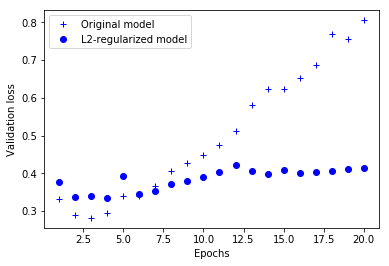

In [22]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.clf()

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [23]:
# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

In [26]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [27]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 8s 317us/step - loss: 0.6117 - acc: 0.6664 - val_loss: 0.4880 - val_acc: 0.8569
Epoch 2/20
25000/25000 [==============================] - 7s 293us/step - loss: 0.4692 - acc: 0.7984 - val_loss: 0.3689 - val_acc: 0.8774
Epoch 3/20
25000/25000 [==============================] - 7s 287us/step - loss: 0.3771 - acc: 0.8547 - val_loss: 0.3051 - val_acc: 0.8880
Epoch 4/20
25000/25000 [==============================] - 7s 289us/step - loss: 0.3196 - acc: 0.8872 - val_loss: 0.2860 - val_acc: 0.8890
Epoch 5/20
25000/25000 [==============================] - 7s 289us/step - loss: 0.2797 - acc: 0.9063 - val_loss: 0.2817 - val_acc: 0.8866
Epoch 6/20
25000/25000 [==============================] - 7s 290us/step - loss: 0.2472 - acc: 0.9172 - val_loss: 0.2868 - val_acc: 0.8889
Epoch 7/20
25000/25000 [==============================] - 7s 294us/step - loss: 0.2246 - acc: 0.9250 - val_loss: 0.2978 - 

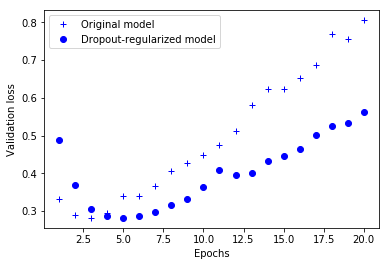

In [28]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.clf()

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()